<a href="https://colab.research.google.com/github/CidClayQuirino/CidClayQuirino/blob/main/EngineeringCoverageMapsBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-4036639499.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(engineers))


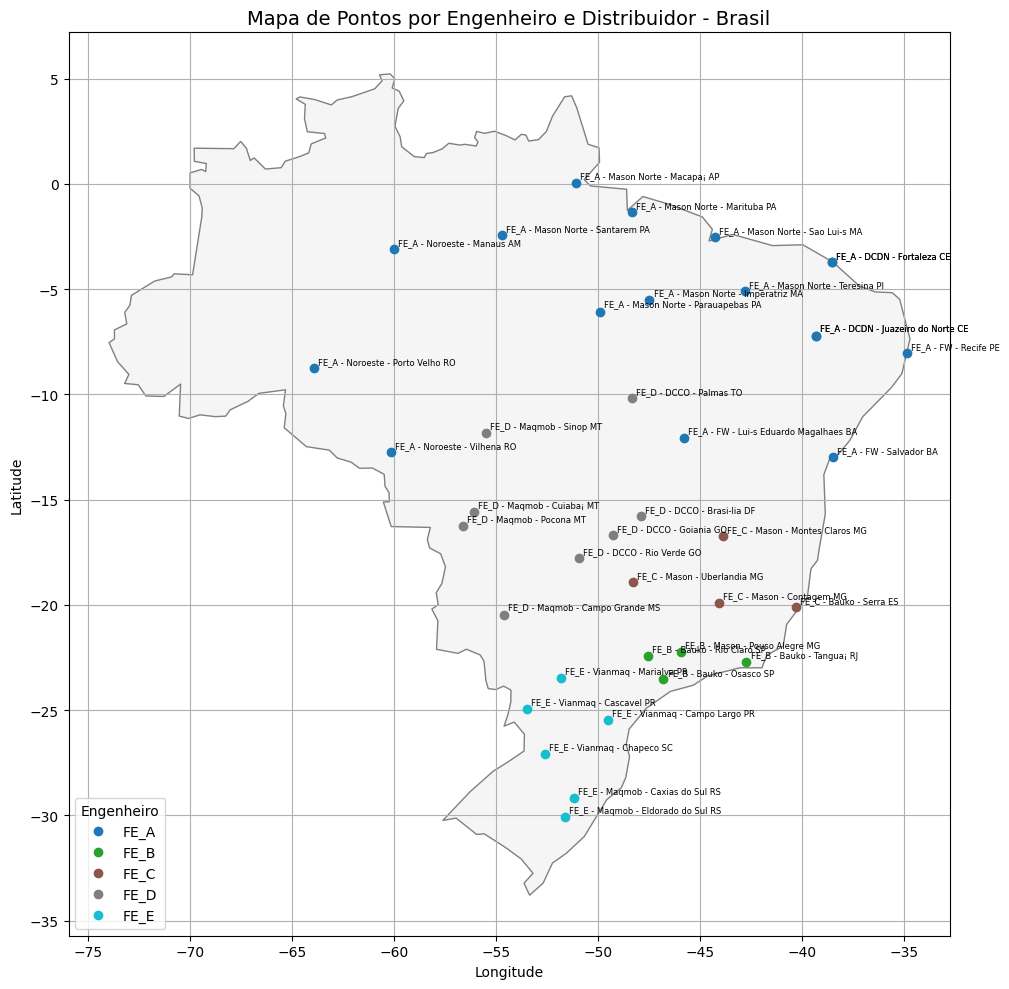

In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Caminhos atualizados para os arquivos
csv_path = "/content/sample_data/engenheiros_distribuidores_localidades.csv"
shapefile_path = "/content/sample_data/ne_110m_admin_0_countries.shp"

# Carregar os dados do CSV com codificação apropriada
df = pd.read_csv(csv_path, encoding="latin1")

# Criar GeoDataFrame com os pontos
geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
gdf_points = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Carregar o shapefile e filtrar apenas o Brasil
world = gpd.read_file(shapefile_path)
brasil = world[world["ADMIN"] == "Brazil"]

# Definir cores distintas para cada engenheiro
engineers = gdf_points["Engenheiro"].unique()
colors = plt.cm.get_cmap("tab10", len(engineers))
color_map = {eng: colors(i) for i, eng in enumerate(engineers)}

# Criar o mapa
fig, ax = plt.subplots(figsize=(12, 10))
brasil.plot(ax=ax, color="whitesmoke", edgecolor="gray")

# Plotar os pontos com rótulos em linha única
for idx, row in gdf_points.iterrows():
    ax.plot(row.geometry.x, row.geometry.y, marker="o", color=color_map[row["Engenheiro"]], markersize=6)
    label_text = f"{row['Engenheiro']} - {row['Distribuidor']} - {row['Localidade']}"
    ax.text(row.geometry.x + 0.2, row.geometry.y + 0.2, label_text, fontsize=6)

# Adicionar legenda
for eng in engineers:
    ax.plot([], [], marker="o", color=color_map[eng], label=eng, linestyle="None")
ax.legend(title="Engenheiro", loc="lower left")

# Título e eixos
ax.set_title("Mapa de Pontos por Engenheiro e Distribuidor - Brasil", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid(True)
plt.tight_layout()

# Salvar o mapa
plt.savefig("/content/sample_data/mapa_engenheiros_distribuidores.png", dpi=300)
plt.show()


/tmp/ipython-input-1427210678.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(engineers))


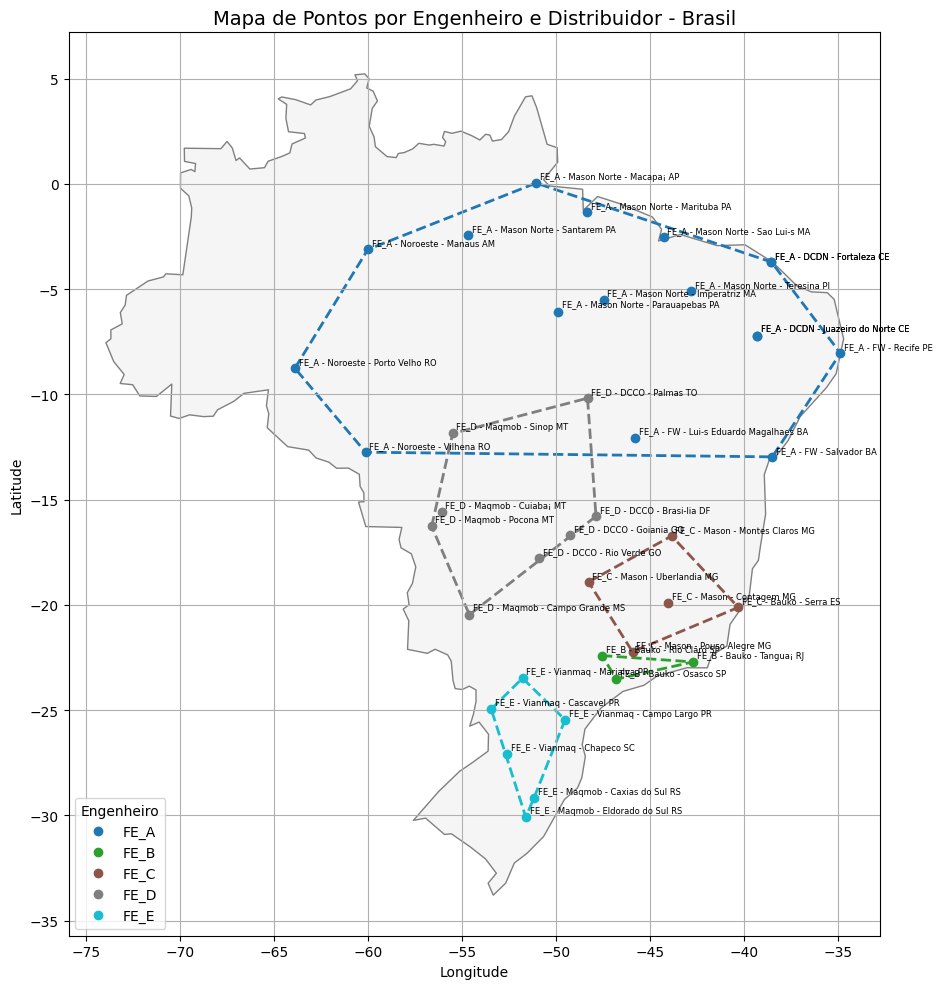

In [20]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, MultiPoint

# Caminhos atualizados para os arquivos
csv_path = "/content/sample_data/engenheiros_distribuidores_localidades.csv"
shapefile_path = "/content/sample_data/ne_110m_admin_0_countries.shp"

# Carregar os dados do CSV com codificação apropriada
df = pd.read_csv(csv_path, encoding="latin1")

# Criar GeoDataFrame com os pontos
geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
gdf_points = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Carregar o shapefile e filtrar apenas o Brasil
world = gpd.read_file(shapefile_path)
brasil = world[world["ADMIN"] == "Brazil"]

# Definir cores distintas para cada engenheiro
engineers = gdf_points["Engenheiro"].unique()
colors = plt.cm.get_cmap("tab10", len(engineers))
color_map = {eng: colors(i) for i, eng in enumerate(engineers)}

# Criar o mapa
fig, ax = plt.subplots(figsize=(12, 10))
brasil.plot(ax=ax, color="whitesmoke", edgecolor="gray")

# Plotar os pontos com rótulos em linha única
for idx, row in gdf_points.iterrows():
    ax.plot(row.geometry.x, row.geometry.y, marker="o", color=color_map[row["Engenheiro"]], markersize=6)
    label_text = f"{row['Engenheiro']} - {row['Distribuidor']} - {row['Localidade']}"
    ax.text(row.geometry.x + 0.2, row.geometry.y + 0.2, label_text, fontsize=6)

# Adicionar cercas individuais por engenheiro
for eng in engineers:
    eng_points = gdf_points[gdf_points["Engenheiro"] == eng]
    if len(eng_points) > 2:
        points_union = MultiPoint(eng_points.geometry.tolist())
        hull = points_union.convex_hull
        gpd.GeoSeries([hull], crs="EPSG:4326").plot(ax=ax, facecolor="none", edgecolor=color_map[eng], linewidth=2, linestyle="--")

# Adicionar legenda
for eng in engineers:
    ax.plot([], [], marker="o", color=color_map[eng], label=eng, linestyle="None")
ax.legend(title="Engenheiro", loc="lower left")

# Título e eixos
ax.set_title("Mapa de Pontos por Engenheiro e Distribuidor - Brasil", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid(True)
plt.tight_layout()

# Salvar o mapa
plt.savefig("/content/sample_data/mapa_engenheiros_distribuidores_com_cercas_individuais.png", dpi=300)
plt.show()


In [26]:
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import Point, MultiPoint
import matplotlib.pyplot as plt

# Caminhos atualizados
csv_path = "/content/sample_data/engenheiros_distribuidores_localidades.csv"
shapefile_path = "/content/sample_data/ne_110m_admin_0_countries.shp"

# Carregar CSV
df = pd.read_csv(csv_path, encoding="latin1")

# Criar GeoDataFrame
geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
gdf_points = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Carregar shapefile e filtrar Brasil
world = gpd.read_file(shapefile_path)
brasil = world[world["ADMIN"] == "Brazil"]

# Centro do mapa
center_lat = gdf_points["Latitude"].mean()
center_lon = gdf_points["Longitude"].mean()

# Criar mapa interativo
m = folium.Map(location=[center_lat, center_lon], zoom_start=4)

# Adicionar polígono do Brasil
brasil_json = brasil.to_crs(epsg=4326).simplify(0.01).to_json()
folium.GeoJson(brasil_json, name="Brasil", style_function=lambda x: {
    'fillColor': 'whitesmoke',
    'color': 'gray',
    'weight': 1,
    'fillOpacity': 0.1
}).add_to(m)

# Cores por engenheiro usando matplotlib
engineers = gdf_points["Engenheiro"].unique()
colors = plt.cm.get_cmap("tab10", len(engineers))
color_map = {
    eng: f"#{int(colors(i)[0]*255):02x}{int(colors(i)[1]*255):02x}{int(colors(i)[2]*255):02x}"
    for i, eng in enumerate(engineers)
}

# Pontos e cercas
for eng in engineers:
    eng_points = gdf_points[gdf_points["Engenheiro"] == eng]
    color = color_map[eng]

    for idx, row in eng_points.iterrows():
        popup_text = f"{row['Engenheiro']} - {row['Distribuidor']} - {row['Localidade']}"
        folium.CircleMarker(
            location=[row.geometry.y, row.geometry.x],
            radius=8,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.8,
            popup=popup_text
        ).add_to(m)

    if len(eng_points) > 2:
        points_union = MultiPoint(eng_points.geometry.tolist())
        hull = points_union.convex_hull
        if hull.geom_type == 'Polygon':
            folium.GeoJson(
                data=gpd.GeoSeries([hull], crs="EPSG:4326").to_json(),
                style_function=lambda x, col=color: {
                    'fillColor': 'none',
                    'color': col,
                    'weight': 2,
                    'dashArray': '5, 5'
                },
                tooltip=f"Área de atuação: {eng}"
            ).add_to(m)

# Controles
folium.LayerControl().add_to(m)

# Exibir mapa (em Jupyter ou ambiente compatível)
m


/tmp/ipython-input-879192867.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(engineers))
